In [3]:
!pip install tpot
!pip install shap
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=1e4e96c92e21fbebae3ba365974d5548a6e2d87aa4f1d9e5e276ded04cc037de
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.1 MB/s eta 0:00:00


In [4]:
df = pd.read_csv('Starbucks.csv')

In [5]:
print(df.columns)

Index(['Calories', ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)',
       ' Sodium (mg)', ' Total Carbohydrates (g) ', 'Cholesterol (mg)',
       ' Dietary Fibre (g)', ' Sugars (g)', ' Protein (g) ',
       'Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ',
       'Iron (% DV) ', 'Encoded_Category', 'Bevg_Prep', 'cafe_numic'],
      dtype='object')


In [6]:
X = df.drop(' Protein (g) ', axis=1)  # Assuming 'Protein (g)' is the target variable
y = df[' Protein (g) ']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor()

In [9]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [10]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")


Train MAE: 0.2363148148148148
Test MAE: 0.660875


In [11]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 25it [00:25,  1.26s/it]


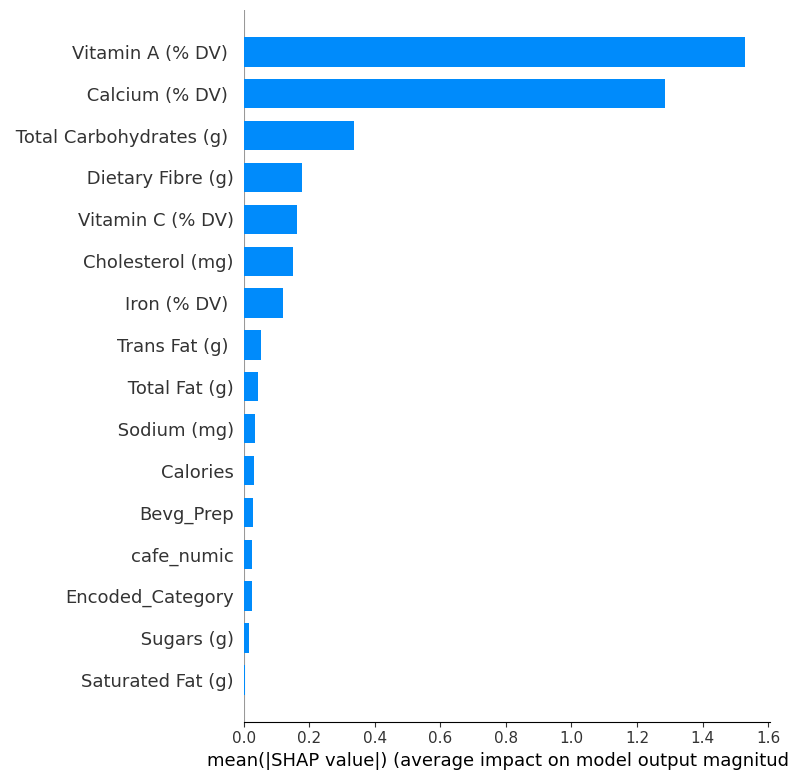

In [12]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

# OLS Regression Result

In [13]:
X = sm.add_constant(X)

In [14]:
model = sm.OLS(y, X)

In [15]:
results = model.fit()

# Print the summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Protein (g)    R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     850.4
Date:                Sat, 09 Mar 2024   Prob (F-statistic):          6.64e-190
Time:                        00:00:46   Log-Likelihood:                -225.17
No. Observations:                 240   AIC:                             484.3
Df Residuals:                     223   BIC:                             543.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X = df.drop(' Protein (g) ', axis=1).values
y = df[' Protein (g) '].values.reshape(-1, 1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32)

# Define the neural network structure
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the network
model = Net()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(50):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(X_train_torch)

    # Compute loss
    loss = criterion(y_pred, y_train_torch)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train_torch)
    y_test_pred = model(X_test_torch)
    train_mae = (y_train_pred - y_train_torch).abs().mean().item()
    test_mae = (y_test_pred - y_test_torch).abs().mean().item()

print(f'\ntrain MAE = {train_mae}, test MAE = {test_mae}')

Epoch 0, Loss: 70.2944564819336
Epoch 10, Loss: 39.98472595214844
Epoch 20, Loss: 18.619871139526367
Epoch 30, Loss: 8.887846946716309
Epoch 40, Loss: 4.047216415405273

train MAE = 1.1400529146194458, test MAE = 1.4905709028244019


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train MAE: 0.23092708333333334
Test MAE: 0.63475


Text(0.5, 0, 'Random Forest Feature Importance')

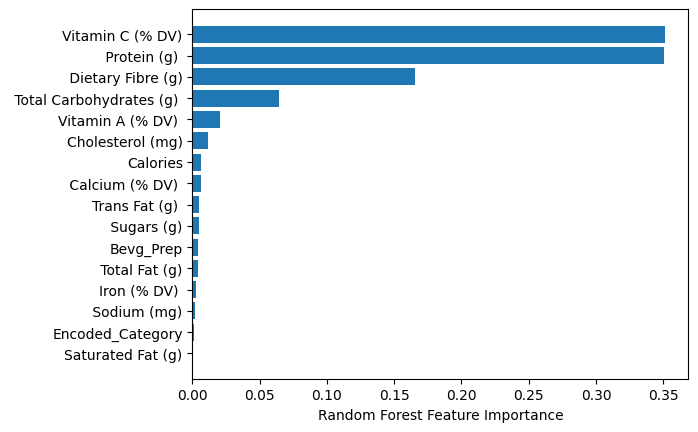

In [18]:
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")

# If needed, you can also get the feature importance
feature_importance = model.feature_importances_

# Optional: to visualize the feature importance
import matplotlib.pyplot as plt
sorted_idx = model.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming the DataFrame is named 'df' and is already loaded with data
# Define the target variable 'y' and features 'X' without using .iloc
y = df[' Protein (g) ']  # The target variable column name
X = df.drop(' Protein (g) ', axis=1)  # Features DataFrame by dropping the target column

# Verify that X is a DataFrame, which it should be after dropping a column from df
print(type(X))  # This should print <class 'pandas.core.frame.DataFrame'>

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Create a pipeline that includes preprocessing and model fitting
pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions and evaluate the model
y_train_pred = pipeline.predict(X_train)
y_train_pred = y_train_pred.reshape(-1, 1)  # Ensuring it's a 2D array if necessary
y_test_pred = pipeline.predict(X_test)
y_test_pred = y_test_pred.reshape(-1, 1)  # Ensuring it's a 2D array if necessary

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)




<class 'pandas.core.frame.DataFrame'>


In [20]:
nan_frame = pd.DataFrame(columns=[col for col in df.columns if col != ' Protein (g) '], index=[0])

# Display the empty DataFrame
nan_frame

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Encoded_Category,Bevg_Prep,cafe_numic
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
nan_frame = pd.DataFrame(columns=df.drop(' Protein (g) ', axis=1).columns, index=[0])
nan_frame = nan_frame.apply(lambda x: x.fillna(0))  # Replace NaN with 0 if necessary

# Use the pipeline to make a prediction on the nan_frame
base_value = pipeline.predict(nan_frame)

# Since we only have one prediction, we take the first element and round it
base_value = round(base_value[0], 3)

# Print the expected value of the output
print(f"Expected value of the output (base value): {base_value}")

Expected value of the output (base value): 0.041


In [22]:
X_test.iloc[0: 1]

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Encoded_Category,Bevg_Prep,cafe_numic
216,90,0.1,0.0,0.0,0,160,20,0,19,0.04,0.0,0.1,0.0,4,9,28


In [23]:
first_test_sample = X_test.iloc[0:1]

# Making a prediction on the selected sample
sample_prediction = round(pipeline.predict(first_test_sample)[0], 3)

# Retrieve the actual value corresponding to the first test sample
actual_value = y_test.iloc[0]

# Print out the prediction and the actual value
print(f"Current Prediction: {sample_prediction}, Actual value: {actual_value}")

Current Prediction: 3.416, Actual value: 3.0


# PARTIAL DEPENDENCE PLOTS

In [24]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

In [25]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

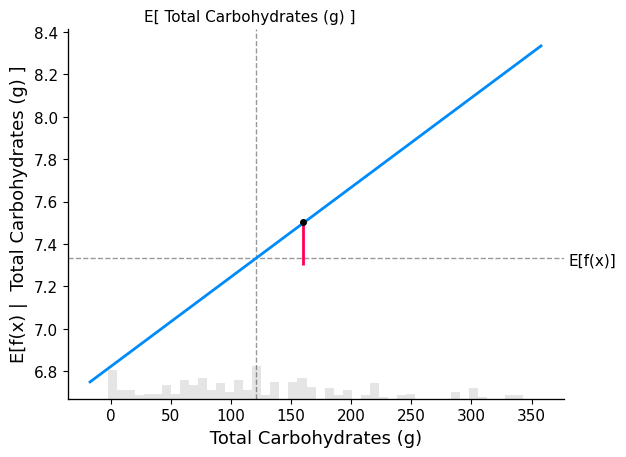

In [26]:
partial_dependence_plot(' Total Carbohydrates (g) ', 0)

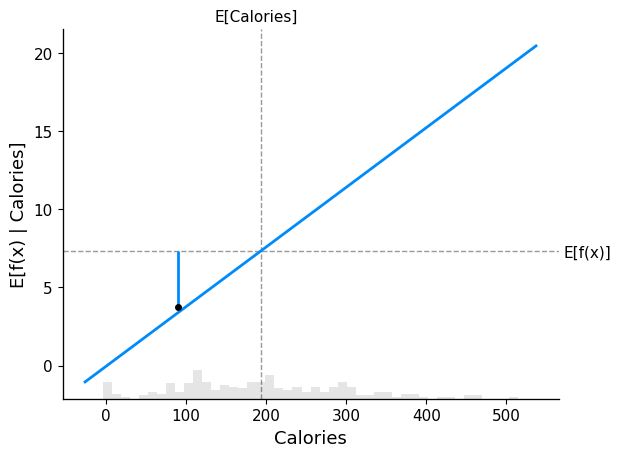

In [27]:
partial_dependence_plot('Calories', 0)

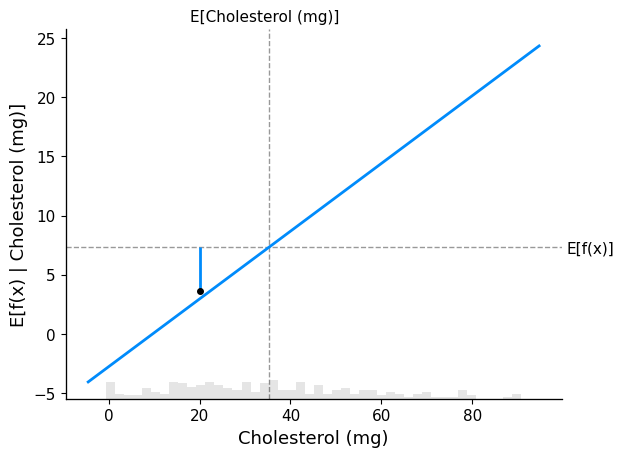

In [28]:
partial_dependence_plot('Cholesterol (mg)', 0)

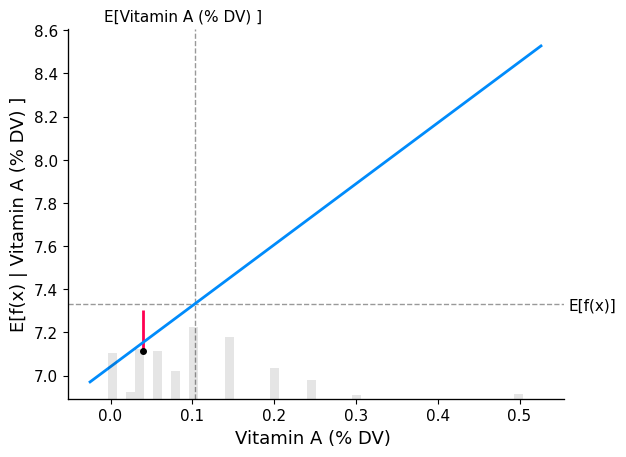

In [29]:
partial_dependence_plot('Vitamin A (% DV) ', 0)

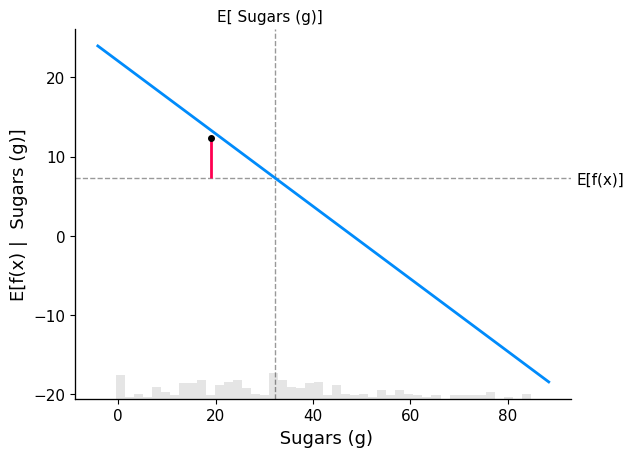

In [30]:
partial_dependence_plot(' Sugars (g)', 0)

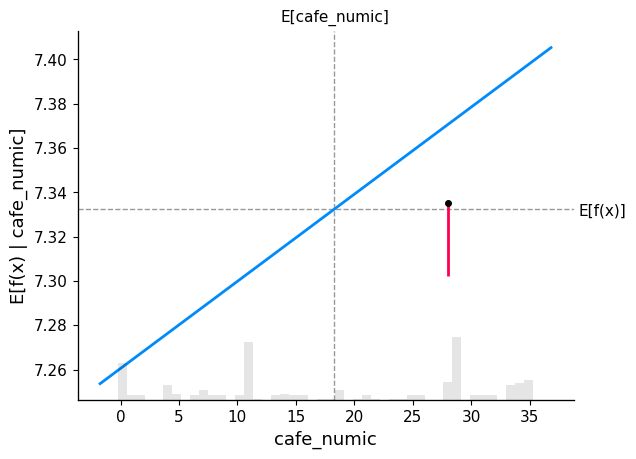

In [31]:
partial_dependence_plot('cafe_numic', 0)

# SHAP PLOTS

In [32]:
shap.initjs()

In [33]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

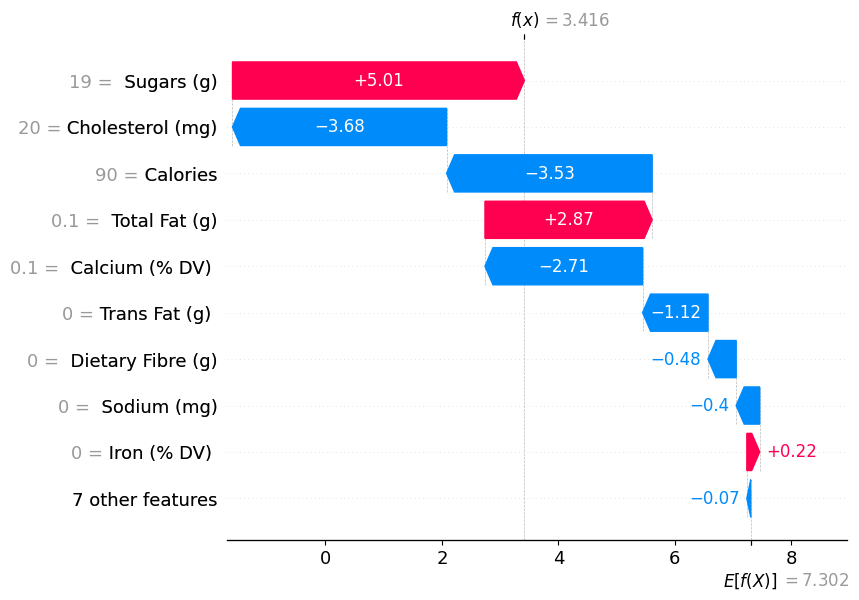

In [34]:
sample_feature_importance(0, 'waterfall')

In [35]:
# Initialize JavaScript visualization in the notebook
shap.initjs()

# Create a TreeExplainer object for your model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the first instance in the test set
shap_values = explainer.shap_values(X_test.iloc[0])

# Visualize the first instance's SHAP values using a force plot
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0])

FEATURE IMPORTANCE FOR MODEL

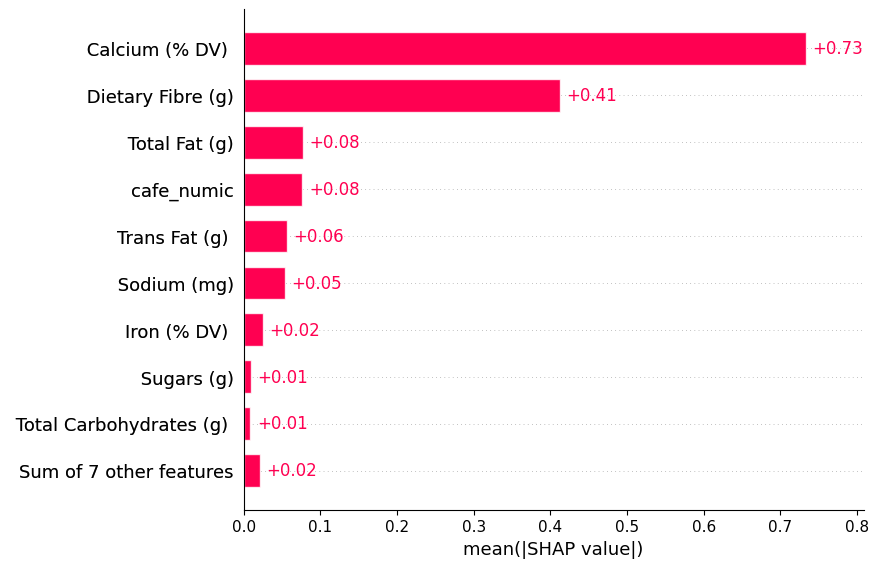

In [36]:
# Create the SHAP explainer
explainer = shap.Explainer(model, X_train)

# Generate SHAP values for the entire test set or a subset
shap_values = explainer(X_test)

# Now you can plot the SHAP values with a bar plot
shap.plots.bar(shap_values)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([192])) that is different to the input size (torch.Size([192, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 68.96269226074219
Epoch 10, Loss: 50.95228958129883
Epoch 20, Loss: 33.82633972167969
Epoch 30, Loss: 29.335975646972656
Epoch 40, Loss: 25.563066482543945
Train MAE: 3.916527622441451, Test MAE: 4.071314722299576


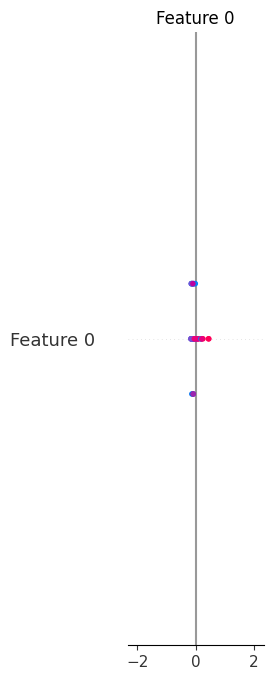

In [37]:
import shap
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim


# Define your target variable and features blue #
X = df.drop([' Protein (g) '], axis=1)
y = df[' Protein (g) '].values

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
mapper = DataFrameMapper([(X_train.columns, StandardScaler())])
X_train_scaled = mapper.fit_transform(X_train)
X_test_scaled = mapper.transform(X_test)

# Define the neural network structure
model = nn.Sequential(
    nn.Linear(X_train_scaled.shape[1], 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Train the neural network
for epoch in range(50):  # Assuming 50 epochs
    model.train()
    optimizer.zero_grad()
    outputs = model(torch.FloatTensor(X_train_scaled))
    loss = criterion(outputs, torch.FloatTensor(y_train))
    loss.backward()
    optimizer.step()

    # Print out the loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Evaluate the model
model.eval()
y_pred = model(torch.FloatTensor(X_test_scaled)).detach().numpy()
test_mae = mean_absolute_error(y_test, y_pred)
y_pred_train = model(torch.FloatTensor(X_train_scaled)).detach().numpy()
train_mae = mean_absolute_error(y_train, y_pred_train)

# Print out Mean Absolute Error for train and test sets
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")

# Create SHAP values using DeepExplainer
explainer = shap.DeepExplainer(model, torch.FloatTensor(X_train_scaled))
shap_values = explainer.shap_values(torch.FloatTensor(X_test_scaled))

# Generate summary plot for the SHAP values
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")


In [38]:
#NNM
from torch.autograd import Variable

X = df.drop(' Protein (g) ', axis=1)
y = df[' Protein (g) '].values.reshape(-1, 1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a mapper for preprocessing
mapper = DataFrameMapper([(X.columns, StandardScaler())])
preprocessed_X_train = mapper.fit_transform(X_train)

# Neural network parameters
num_epochs = 50
learning_rate = 0.01
hidden_size = 32
batch_size = 50
input_dim = preprocessed_X_train.shape[1]
batch_no = preprocessed_X_train.shape[0] // batch_size

# Neural network model
model = nn.Sequential(
    nn.Linear(input_dim, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 1)
)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        x_batch = Variable(torch.FloatTensor(preprocessed_X_train[start:end]))
        y_batch = Variable(torch.FloatTensor(y_train[start:end]))
        optimizer.zero_grad()
        y_preds = model(x_batch)
        loss = criterion(y_preds, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 10 == 0:
        print("Epoch {}, Loss: {}".format(epoch, running_loss / batch_no))

# Preprocess test data and evaluate the model
preprocessed_X_test = mapper.transform(X_test)
y_pred = model(torch.FloatTensor(preprocessed_X_test)).detach().numpy()
test_mae = mean_absolute_error(y_test, y_pred)
print(f"\nTrain MAE = {round(train_mae, 3)}, Test MAE = {round(test_mae, 3)}")

Epoch 0, Loss: 63.13000742594401
Epoch 10, Loss: 7.4999003410339355
Epoch 20, Loss: 1.5606989463170369
Epoch 30, Loss: 0.8075353503227234
Epoch 40, Loss: 0.5377580324808756

Train MAE = 3.917, Test MAE = 0.78


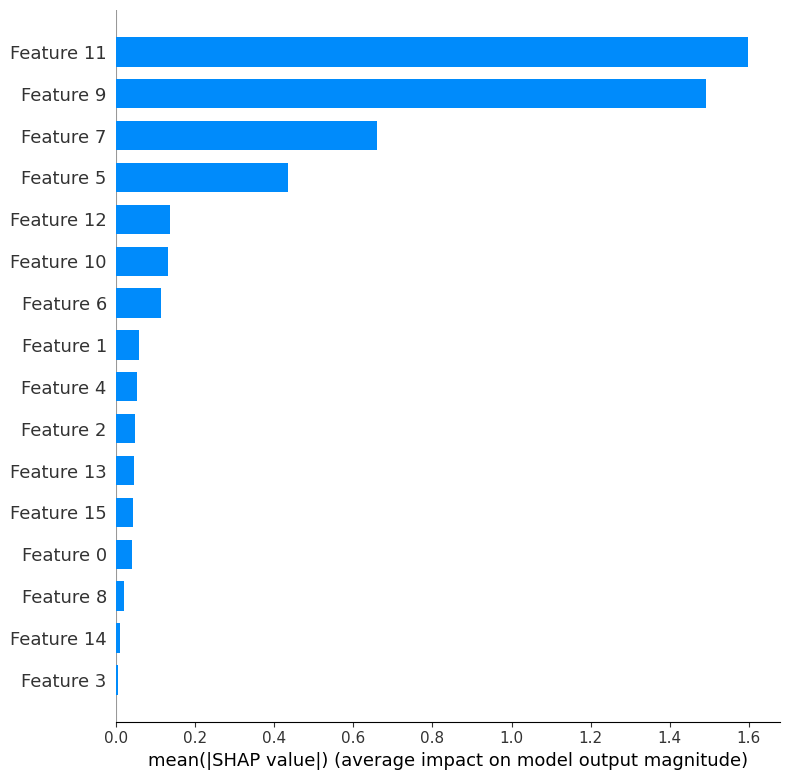

In [39]:
# Define your features and target variable
X = df.drop(' Protein (g) ', axis=1)
y = df[' Protein (g) ']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
mapper = DataFrameMapper([(X_train.columns, StandardScaler())])
preprocessed_X_train = mapper.fit_transform(X_train)
preprocessed_X_test = mapper.transform(X_test)

# Fit a model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(preprocessed_X_train, y_train)

# Create the SHAP explainer and calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(preprocessed_X_test)
X_test_array = X_test.to_numpy()
# Generate the summary bar plot
shap.summary_plot(shap_values, preprocessed_X_test, plot_type='bar')

In [40]:
ninth_feature_name = df.columns[11]
print("Feature 11 corresponds to:", ninth_feature_name)

Feature 11 corresponds to: Vitamin C (% DV)


According to the bar plot feature 11 , i.e. Vitamic C (% DV) the most important feature

# EXPLANATION

1.)

a.) Ordinary Least Squares (OLS) Regression Model:

The OLS regression model is fitted to predict the 'Protein (g)' content based on various nutritional information from a Starbucks dataset. The sm.OLS function from the statsmodels library is used, and an R-squared value of 0.984 is reported, indicating a high degree of fit.
The regression coefficients for each predictor variable, along with their p-values, are listed. For instance:
Calories: A coefficient of 0.0356, indicating that for each one-unit increase in calories, the protein content is expected to increase by 0.0356 grams, assuming all other variables are held constant. This coefficient is statistically significant (p < 0.000).
Total Fat (g): A negative coefficient of -0.9889 suggests that an increase in total fat is associated with a decrease in protein content, and this relationship is significant (p < 0.000).
Calcium (% DV): With a coefficient of 21.9395, this indicates a strong and positive association with the protein content, highly significant (p < 0.000).
Some variables, such as 'Vitamin C (% DV)' and 'Bevg_Prep', show no significant relationship with protein content (p > 0.05).

b.) Linear Regression Model with Pipeline:

Another linear regression model is mentioned as part of a pipeline that includes preprocessing steps (e.g., standard scaling). The training and testing mean absolute errors (MAEs) are reported for this model, but specific regression coefficients are not detailed in the provided snippets.
The emphasis is on the application of pipelines in preprocessing and model fitting rather than the interpretation of individual coefficients.
In summary, the document elaborates on the OLS regression results in detail, providing insights into how each nutritional factor influences the protein content in Starbucks' menu items. The second model, fitted via a pipeline, is discussed in terms of its predictive performance rather than the interpretation of regression coefficients.







2.)

On fitting a tree-based model, specifically a Random Forest Regressor, to the data. However, it does not provide a direct interpretation of the individual nodes within the trees of the Random Forest model. Instead, the focus is on the overall performance of the model and the importance of features based on the Random Forest's output.

To truly interpret the nodes of a tree within a Random Forest, one would need to visualize the trees and examine the conditions at each node. However, given the ensemble nature of Random Forests, where predictions are made by averaging the predictions of many trees, a single tree's interpretation might not represent the overall model's decision-making process. Instead, feature importance metrics are a more practical way to understand what drives the model's predictions at a higher level.

# Finding the best Model Using AutoML

We will use a AUTOML library called 'TPOT' to find the best Model

In [42]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

X = df.drop(' Protein (g) ', axis=1)
y = df[' Protein (g) ']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TPOT regressor
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

# Run the AutoML search
tpot.fit(X_train, y_train)

# Evaluate the model
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.5631655597743999

Generation 2 - Current best internal CV score: -0.5631655597743999

Generation 3 - Current best internal CV score: -0.5443261807582972

Generation 4 - Current best internal CV score: -0.5383115395711624

Generation 5 - Current best internal CV score: -0.5383115395711624

Best pipeline: RidgeCV(RidgeCV(input_matrix))
-0.5112468130246669


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


TPOT found is a Ridge Regression with Cross-Validation (denoted as RidgeCV in the output). The score provided appears to be the internal CV score that TPOT used to evaluate the performance of the models. This score is typically a negative mean squared error, with a higher (less negative) value indicating a better performing model.

The model's score improved slightly over the generations, settling on the RidgeCV model in the end. This suggests that for the Starbucks.csv dataset, with the target variable 'Protein (g)', Ridge Regression performed best.

# Inference on comparing the SHAP values with the model  interpretability methods.

4.) Comparing SHAP values to coefficients in linear models, both provide insights into feature importance but in different ways. Linear regression coefficients directly indicate how the target variable changes with a one-unit change in a predictor, assuming a linear relationship and holding other variables constant. In contrast, SHAP values can capture more complex, non-linear relationships and interactions between features, applicable to a wide range of models beyond just linear regression.

Overall, SHAP offers a more flexible and comprehensive approach to model interpretability, especially for complex models where traditional coefficients or feature importance scores do not fully capture the nuances of how input features affect predictions.